# Anime Recommendation System - Exploratory Data Analysis

This notebook explores the cleaned anime dataset to uncover trends, relationships, and patterns that will guide the recommendation logic.

**_GOALS:_**
1. Analyze key features (e.g., genres, scores, popularity).
2. Identify patterns and correlations.
3. Guide the selection of features for recommendation algorithms.

In [28]:
import pandas as pd

### Load the Cleaned Dataset

In [29]:
anime= pd.read_json('../data/cleaned_anime_data.json')

##### Preview the Dataset

In [30]:
anime.head()

,name_english,name,score,ranked,popularity,members,synopsis,synonyms,type_of,total_episodes,...,scored_9_by,scored_8_by,scored_7_by,scored_6_by,scored_5_by,scored_4_by,scored_3_by,scored_2_by,scored_1_by,img_url
0,Tomorrow's Joe 2,Ashita no Joe 2,8.73,50,3041,51773,Yabuki Joe is left downhearted and hopeless af...,Rocky Joe 2,TV,47,...,4711,3690,1797,653,297,120,137,182,893,https://cdn.myanimelist.net/images/anime/3/450...
1,Mushi-shi: Next Passage Part 2,Mushishi Zoku Shou 2nd Season,8.73,49,907,265728,"Ghostly, primordial beings known as Mushi cont...",Mushishi Zoku Shou 2nd Season,TV,10,...,34334,26218,9892,2672,974,283,134,183,673,https://cdn.myanimelist.net/images/anime/9/680...
2,Kingdom: Season 4,Kingdom 4th Season,8.74,48,2731,63418,Following the conclusion of the large-scale co...,キングダム 第4シリーズ,TV,26,...,9439,6590,1916,461,163,68,52,139,281,https://cdn.myanimelist.net/images/anime/1566/...
3,Vinland Saga,Vinland Saga,8.75,47,77,1502303,Young Thorfinn grew up listening to the storie...,ヴィンランド・サガ,TV,24,...,326376,209929,67519,17475,6602,2908,1321,1030,1822,https://cdn.myanimelist.net/images/anime/1500/...
4,Cowboy Bebop,Cowboy Bebop,8.75,46,43,1857971,"Crime is timeless. By the year 2071, humanity ...",カウボーイビバップ,TV,26,...,271436,203324,96823,32270,13593,4994,1997,1120,2280,https://cdn.myanimelist.net/images/anime/4/196...


##### Get dataset info

In [31]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25949 entries, 0 to 25948
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name_english     25949 non-null  object 
 1   name             25949 non-null  object 
 2   score            16620 non-null  float64
 3   ranked           25949 non-null  int64  
 4   popularity       25949 non-null  int64  
 5   members          25949 non-null  int64  
 6   synopsis         25949 non-null  object 
 7   synonyms         25949 non-null  object 
 8   type_of          22832 non-null  object 
 9   total_episodes   25949 non-null  int64  
 10  premiered        5925 non-null   object 
 11  studios          25949 non-null  object 
 12  genres           25949 non-null  object 
 13  demographic      10044 non-null  object 
 14  duration_per_ep  25949 non-null  object 
 15  rating           25949 non-null  object 
 16  scored_by        16620 non-null  float64
 17  favorites   

##### Basic Stats

In [32]:
anime.describe()

,score,ranked,popularity,members,total_episodes,scored_by,favorites,watching,completed,on_hold,...,scored_10_by,scored_9_by,scored_8_by,scored_7_by,scored_6_by,scored_5_by,scored_4_by,scored_3_by,scored_2_by,scored_1_by
count,16620.000000,25949.000000,25949.000000,2.594900e+04,25949.000000,1.662000e+04,25949.000000,2.594900e+04,2.594900e+04,25949.000000,...,2.594900e+04,25949.000000,25949.000000,25949.000000,25949.000000,25949.000000,25949.000000,25949.000000,25949.000000,25949.000000
mean,6.413465,8204.434930,13143.337855,3.958426e+04,14.548075,3.146964e+04,449.304675,2.576502e+03,2.537167e+04,1018.947281,...,2.845804e+03,3557.397087,5083.301283,4456.177733,2181.268296,1073.483063,478.899881,220.301823,129.662068,144.119928
std,0.914471,6712.338081,7775.041934,1.635669e+05,47.218076,1.207304e+05,4478.435405,1.630061e+04,1.202912e+05,5128.338373,...,2.200254e+04,23628.287267,26242.389873,18581.035053,8395.108426,4153.176451,2202.180927,1095.997140,704.464181,928.464488
min,1.860000,0.000000,1.000000,0.000000e+00,0.000000,1.030000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,1470.000000,6294.000000,2.140000e+02,1.000000,3.610000e+02,0.000000,1.000000e+01,7.700000e+01,3.000000,...,1.000000e+01,2.000000,4.000000,7.000000,9.000000,6.000000,3.000000,2.000000,1.000000,0.000000
50%,6.410000,7610.000000,13042.000000,1.099000e+03,2.000000,1.845500e+03,1.000000,5.400000e+01,4.150000e+02,25.000000,...,2.400000e+01,9.000000,19.000000,41.000000,58.000000,55.000000,26.000000,15.000000,11.000000,17.000000
75%,7.120000,14118.000000,20017.000000,1.025300e+04,13.000000,1.199275e+04,21.000000,5.050000e+02,4.985000e+03,256.000000,...,2.860000e+02,258.000000,550.000000,911.000000,684.000000,404.000000,166.000000,82.000000,50.000000,59.000000
max,9.390000,20610.000000,26517.000000,3.927934e+06,3057.000000,2.785040e+06,225168.000000,1.658326e+06,3.445171e+06,277715.000000,...,1.018339e+06,814015.000000,714594.000000,475975.000000,269843.000000,173800.000000,110074.000000,58193.000000,33220.000000,50590.000000


In [33]:
anime.isnull().sum()

name_english           0
name                   0
score               9329
ranked                 0
popularity             0
members                0
synopsis               0
synonyms               0
type_of             3117
total_episodes         0
premiered          20024
studios                0
genres                 0
demographic        15905
duration_per_ep        0
rating                 0
scored_by           9329
favorites              0
aired                  0
source                 0
watching               0
completed              0
on_hold                0
dropped                0
plan_to_watch          0
total                  0
scored_10_by           0
scored_9_by            0
scored_8_by            0
scored_7_by            0
scored_6_by            0
scored_5_by            0
scored_4_by            0
scored_3_by            0
scored_2_by            0
scored_1_by            0
img_url              202
dtype: int64

In [34]:
anime.columns

Index(['name_english', 'name', 'score', 'ranked', 'popularity', 'members',
       'synopsis', 'synonyms', 'type_of', 'total_episodes', 'premiered',
       'studios', 'genres', 'demographic', 'duration_per_ep', 'rating',
       'scored_by', 'favorites', 'aired', 'source', 'watching', 'completed',
       'on_hold', 'dropped', 'plan_to_watch', 'total', 'scored_10_by',
       'scored_9_by', 'scored_8_by', 'scored_7_by', 'scored_6_by',
       'scored_5_by', 'scored_4_by', 'scored_3_by', 'scored_2_by',
       'scored_1_by', 'img_url'],
      dtype='object')

In [35]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

## Genres
### Genre Distribution
This plot shows the frequency of different anime genres in the dataset. Genres like "Action," "Comedy," and "Fantasy" are the most common, which might reflect audience preferences or industry trends.

##### Explode Genres into individual rows

In [37]:
anime['genres'] = anime['genres'].apply(lambda x:x if isinstance(x, list) else [])
genre_counts = anime['genres'].explode().value_counts()

##### Plot genre frequencies

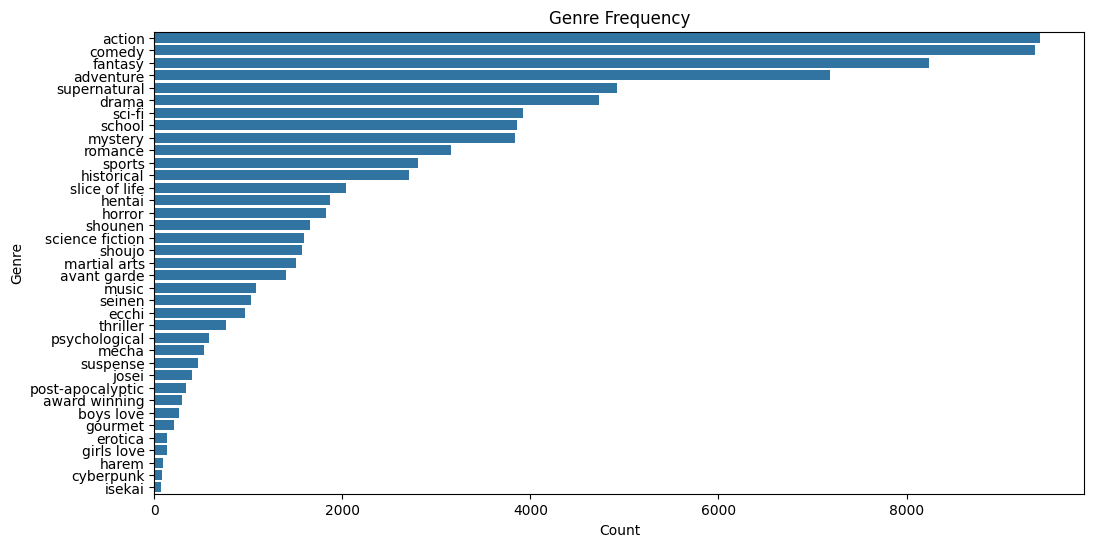

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Genre Frequency")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### Observations
1. The most common genres are
   * action
   * comedy
   * fantasy
2. The least common genres are
   * isekai
   * cyberpunk

## Ratings

##### Indentify trends in ratings (e.g., are most scores high? Low? Normally distrubuted?)

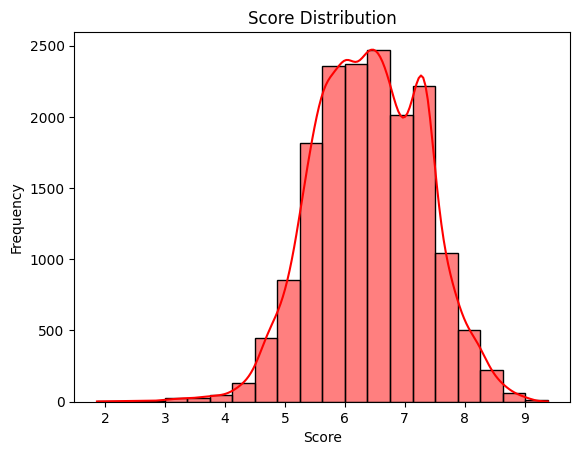

In [39]:
sns.histplot(anime['score'], bins=20, kde=True, color='red')
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### Observations
Based off of the graph most of the ratings are between 5.5-7.5. As the the ratings get lower or higher there are less scores.

## Rank vs Score

##### Create a scatter plot with popularity on the x-axis and score on the y-axis

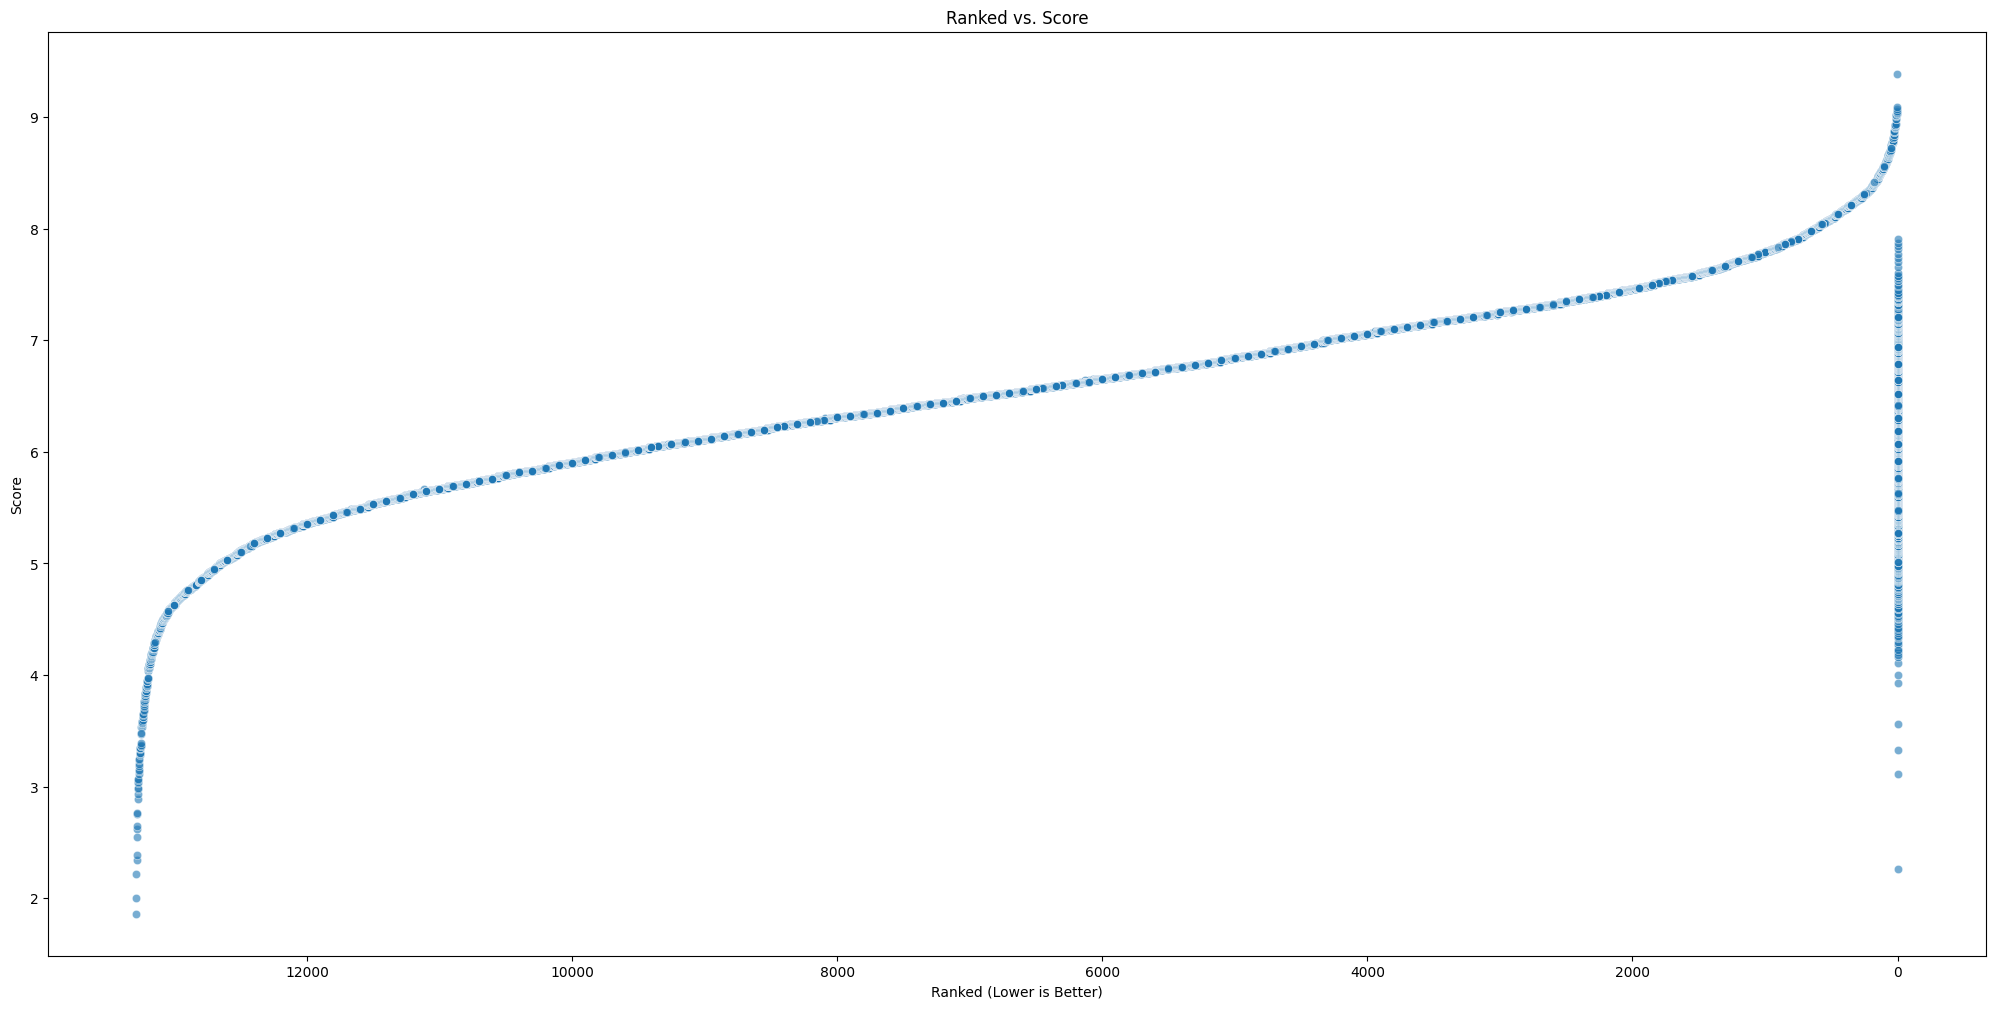

In [40]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='ranked', y='score', data=anime, alpha=0.6)
plt.gca().invert_xaxis()
plt.title("Ranked vs. Score")
plt.xlabel("Ranked (Lower is Better)")
plt.ylabel("Score")
plt.show()

## Members vs Score

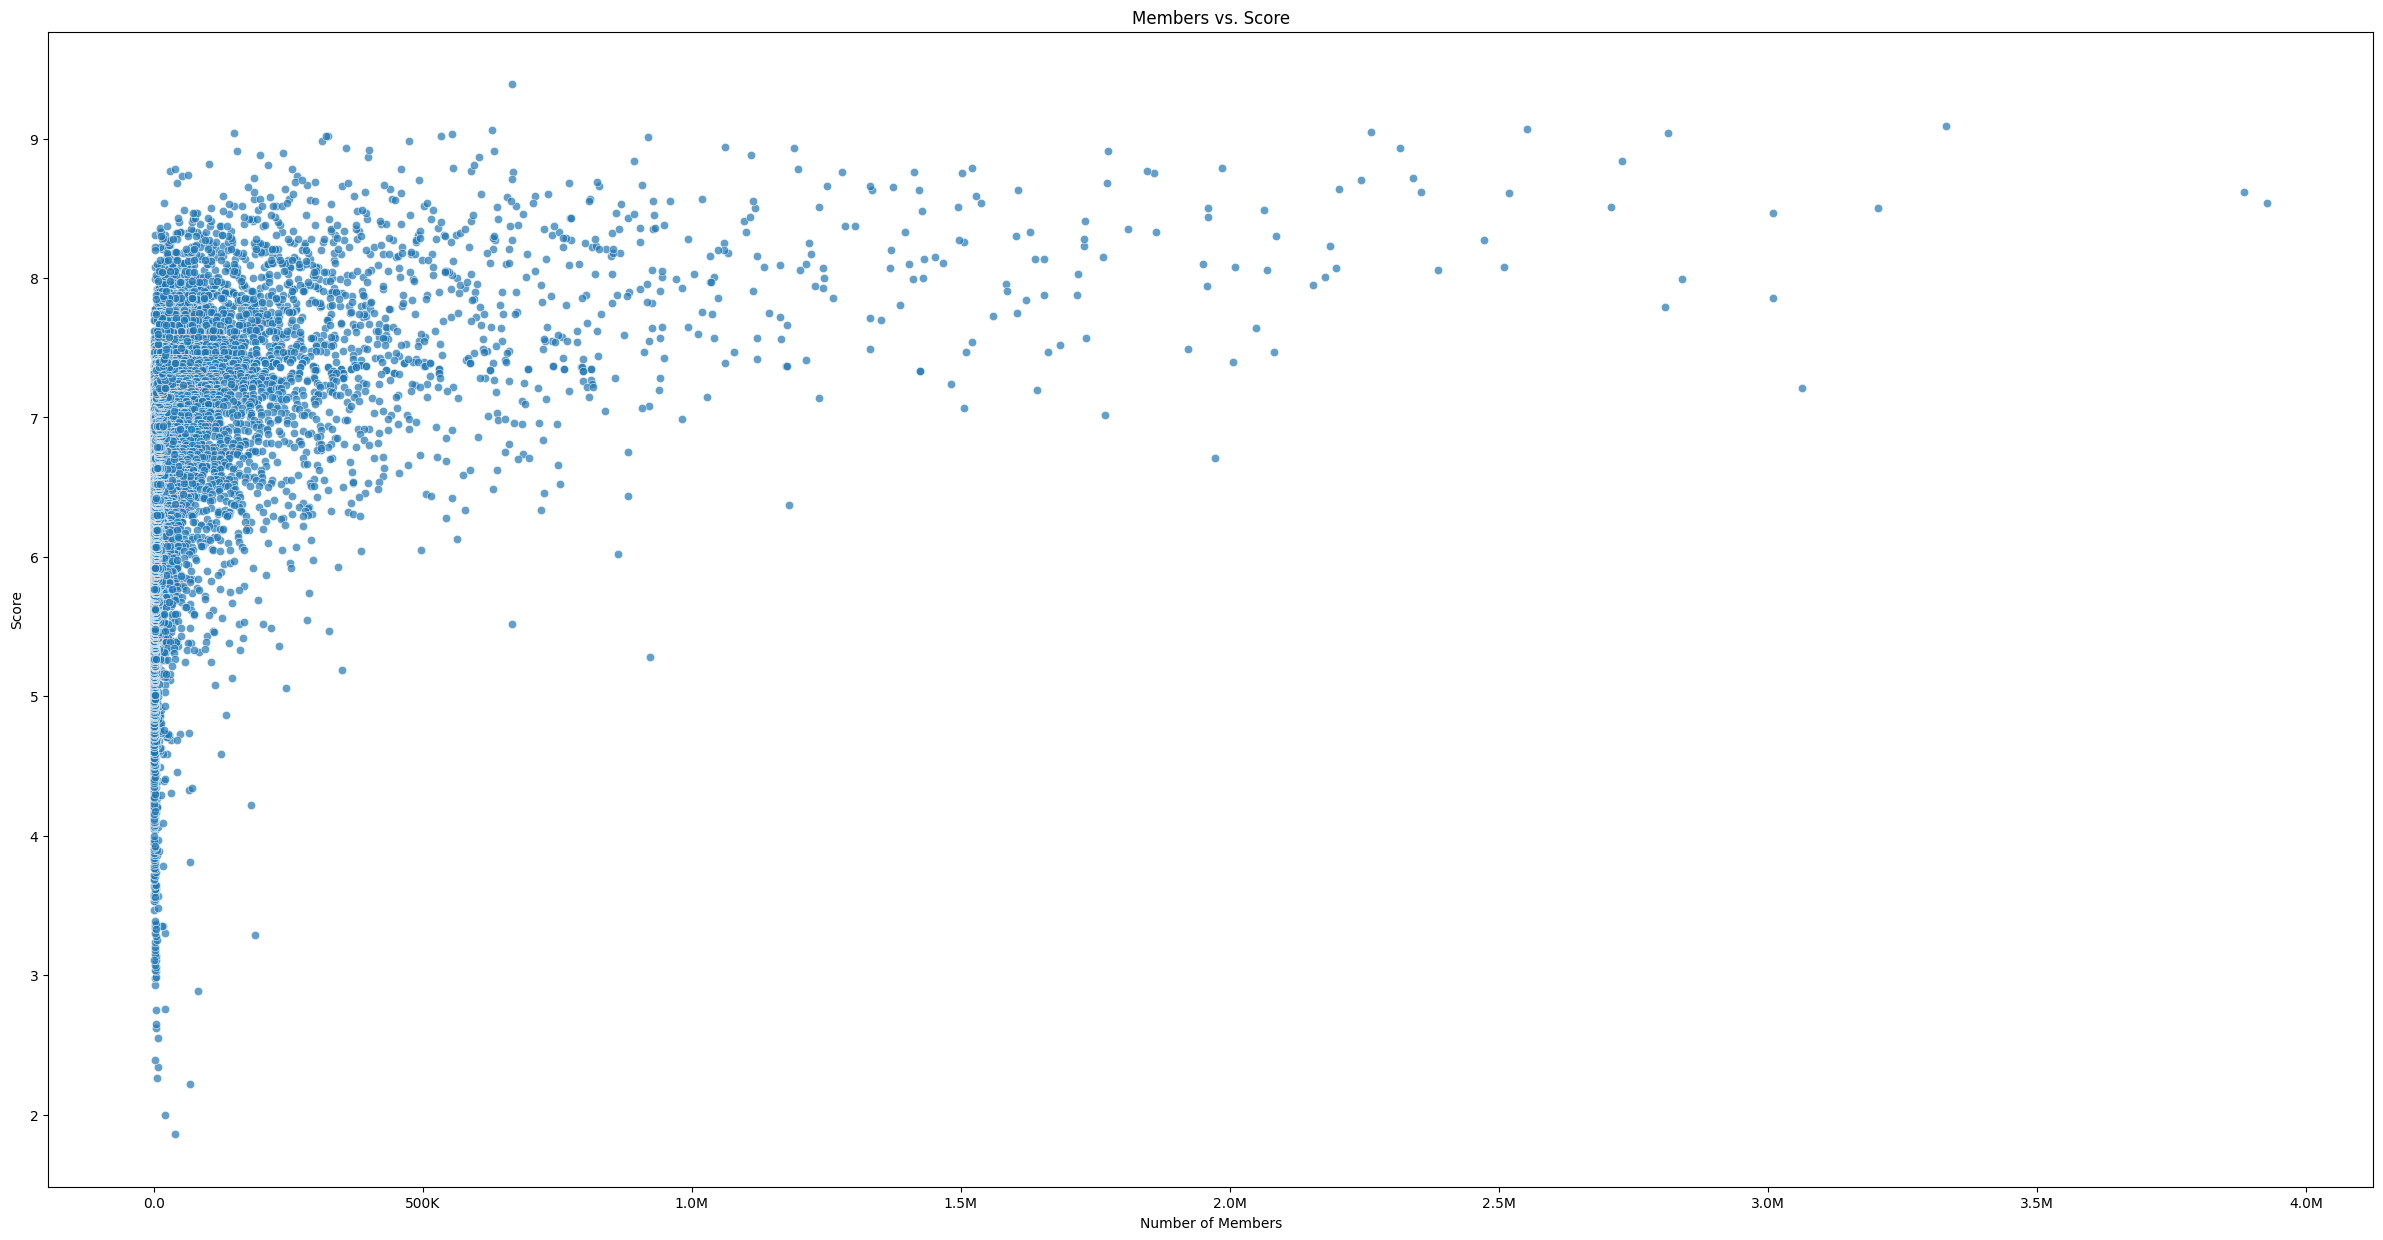

In [41]:
from matplotlib.ticker import FuncFormatter
def format_members(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return str(x)
        
plt.figure(figsize=(30,15))
sns.scatterplot(x='members', y='score', data=anime, alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_members))
plt.title("Members vs. Score")
plt.xlabel("Number of Members")
plt.ylabel("Score")
plt.show()

## Popularity vs Score

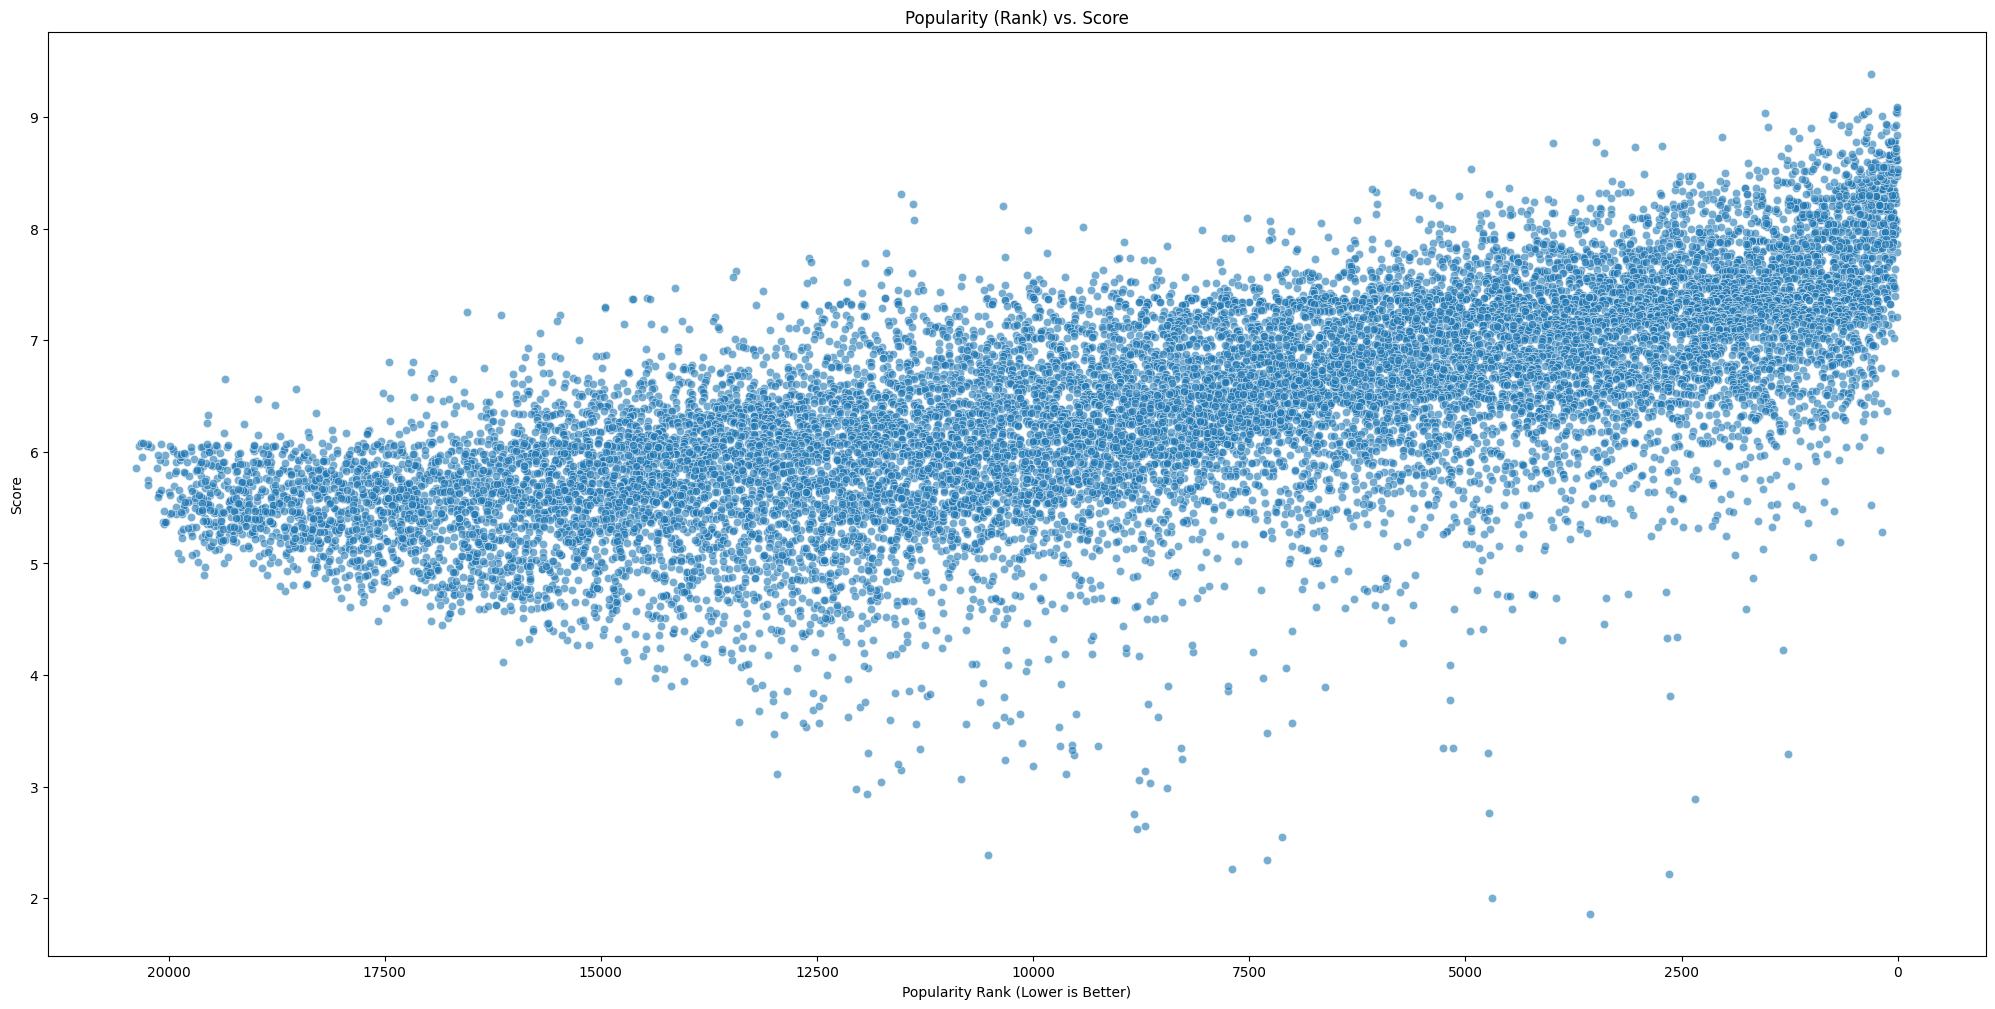

In [42]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='popularity', y='score', data=anime, alpha=0.6)
plt.gca().invert_xaxis()
plt.title("Popularity (Rank) vs. Score")
plt.xlabel("Popularity Rank (Lower is Better)")
plt.ylabel("Score")
plt.show()

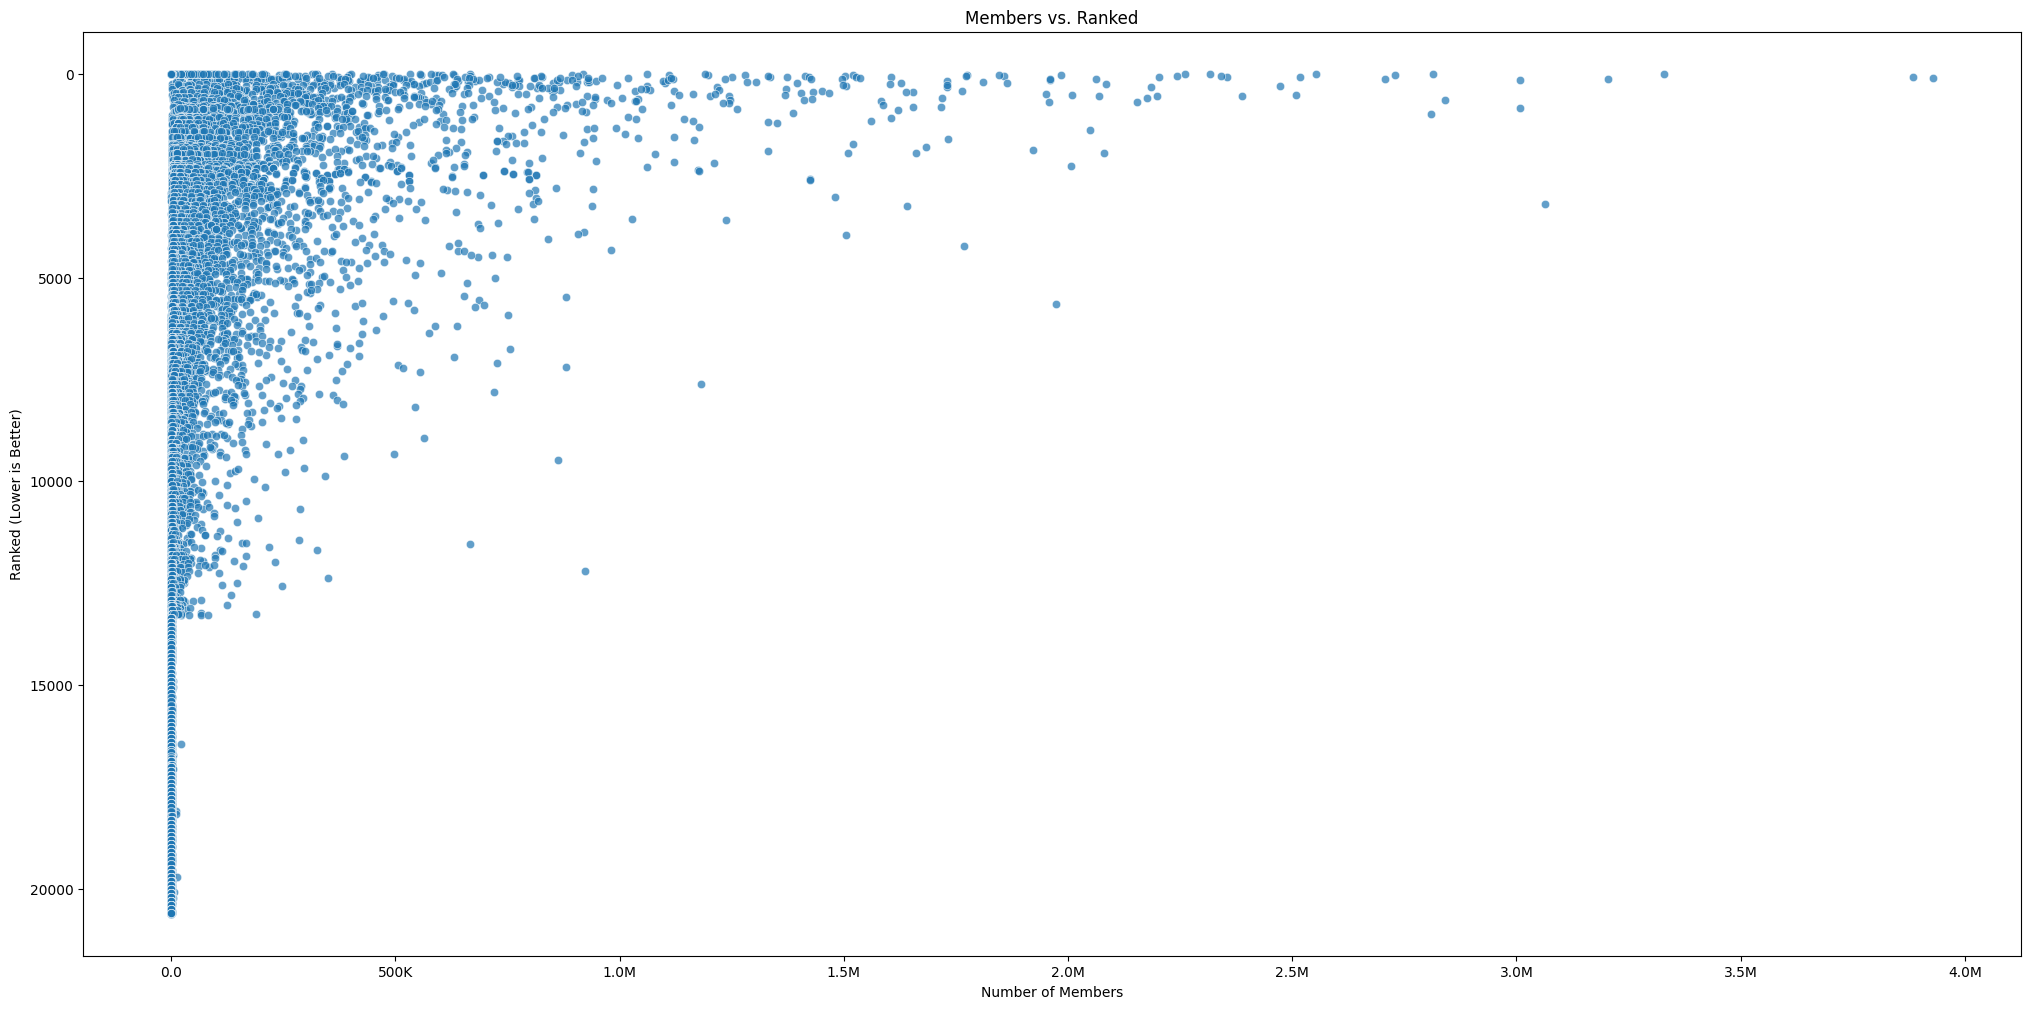

In [43]:
def format_members(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return str(x)
plt.figure(figsize=(25,12))
sns.scatterplot(x='members', y='ranked', data=anime, alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_members))
plt.gca().invert_yaxis()
plt.title("Members vs. Ranked")
plt.xlabel("Number of Members")
plt.ylabel("Ranked (Lower is Better)")
plt.show()

## Genres vs. Score

In [44]:
genre_avg_scores = anime.explode('genres').groupby('genres')['score'].mean().sort_values()

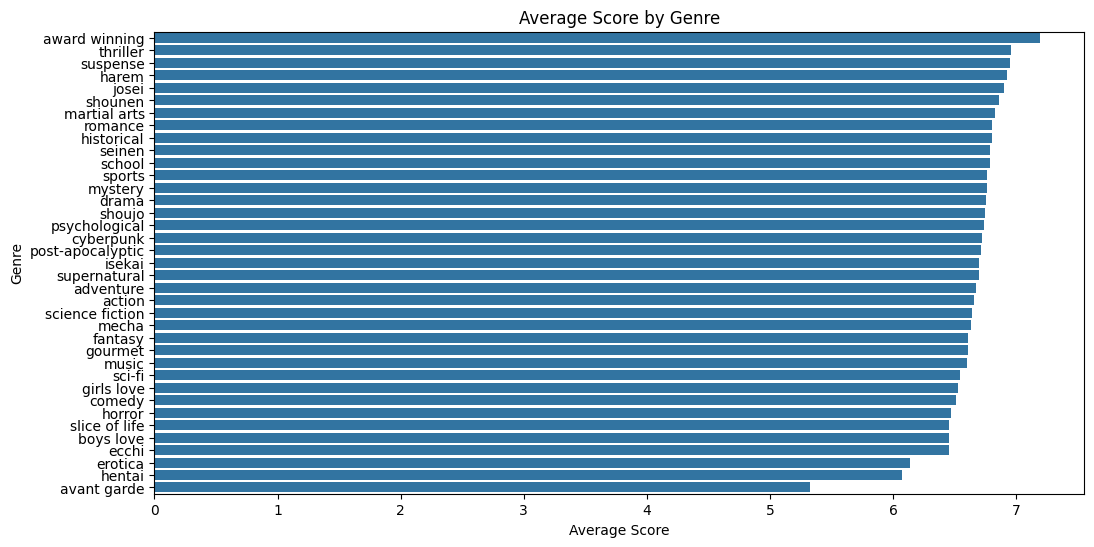

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_avg_scores.values, y=genre_avg_scores.index)
plt.gca().invert_yaxis()
plt.title("Average Score by Genre")
plt.xlabel("Average Score")
plt.ylabel("Genre")
plt.show()

In [47]:
genre_members = anime.explode('genres').groupby('genres')['members'].sum().sort_values()

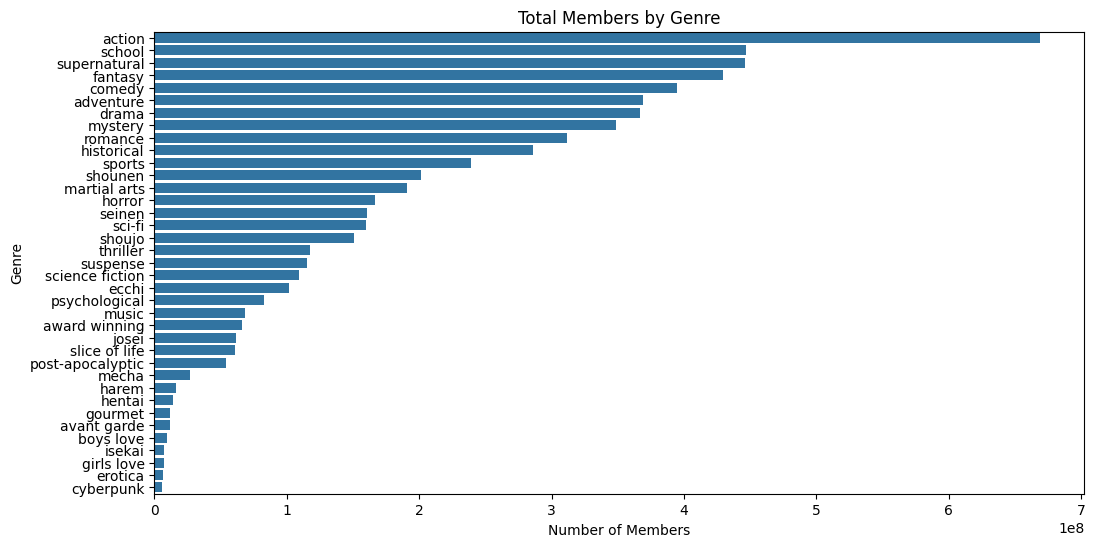

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_members.values, y=genre_members.index)
plt.gca().invert_yaxis()
plt.title("Total Members by Genre")
plt.xlabel("Number of Members")
plt.ylabel("Genre")
plt.show()

## Correlation Analysis

In [49]:
correlation = anime[['score', 'ranked', 'popularity', 'members', 'favorites']].corr()

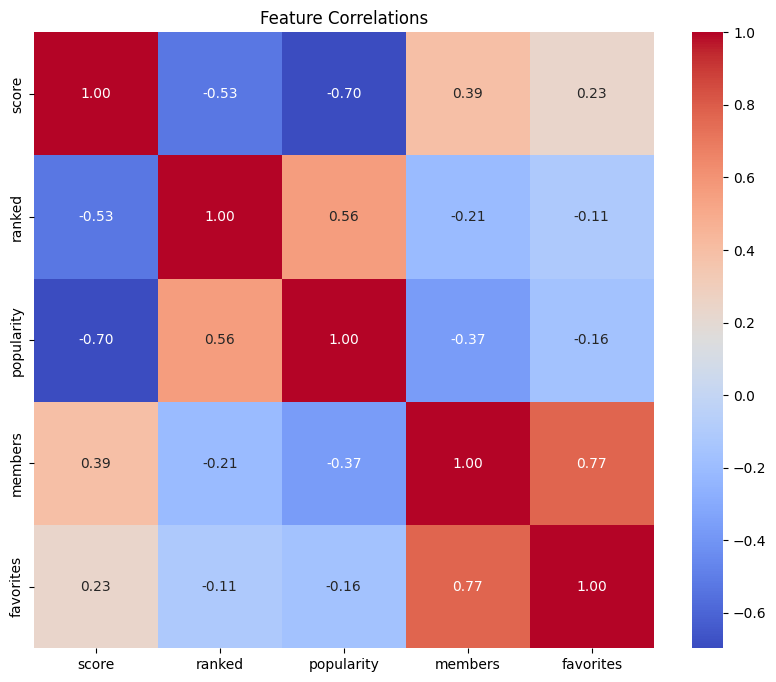

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

## Boxplot for scores

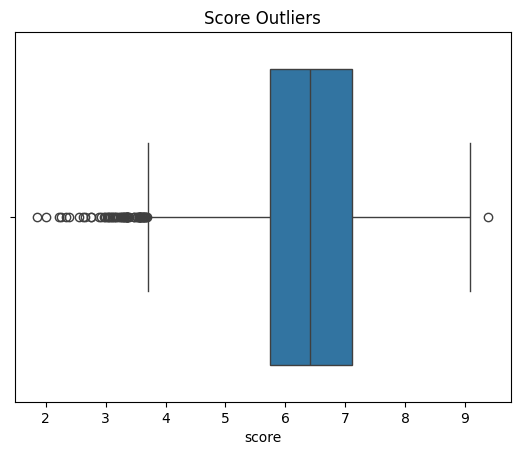

In [51]:
sns.boxplot(x=anime['score'])
plt.title("Score Outliers")
plt.show()

## Boxplot for members

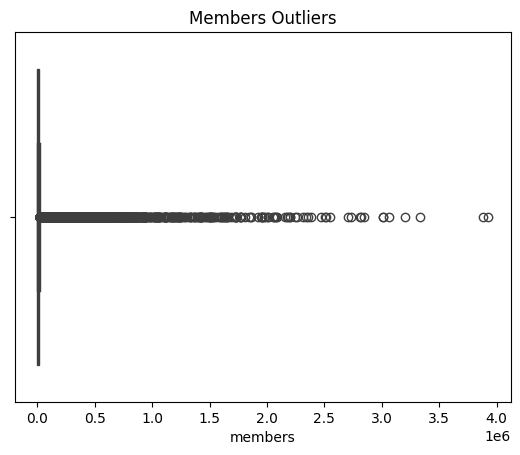

In [53]:
sns.boxplot(x=anime['members'])
plt.title("Members Outliers")
plt.show()

In [67]:
def parse_aired_dates(aired):
    if pd.isnull(aired):
        return None, None
    dates = aired.split(' to ')
    start_date = pd.to_datetime(dates[0].strip(), errors='coerce') if dates[0].strip() else None
    end_date = pd.to_datetime(dates[1].strip(), errors='coerce') if len(dates) > 1 and dates[1].strip() else None
    return start_date, end_date

In [68]:
anime[['start_date', 'end_date']] = anime['aired'].apply(lambda x: pd.Series(parse_aired_dates(x)))

In [69]:
print(anime)

                                            name_english  \
0                                       Tomorrow's Joe 2   
1                         Mushi-shi: Next Passage Part 2   
2                                      Kingdom: Season 4   
3                                           Vinland Saga   
4                                           Cowboy Bebop   
...                                                  ...   
25944                                           Adorable   
25945                  Kateikyoushi x ** 2 The Animation   
25946  Zombie no Afureta Sekai de Ore dake ga Osowarenai   
25947                                   Jungle of Desire   
25948                    Tsuma wo Dousoukai ni Ikasetara   

                                                    name  score  ranked  \
0                                        Ashita no Joe 2   8.73      50   
1                          Mushishi Zoku Shou 2nd Season   8.73      49   
2                                     Kingdom 4th Seas

In [70]:
anime['release_year'] = anime['start_date'].dt.year

## Analyze Time Trends:

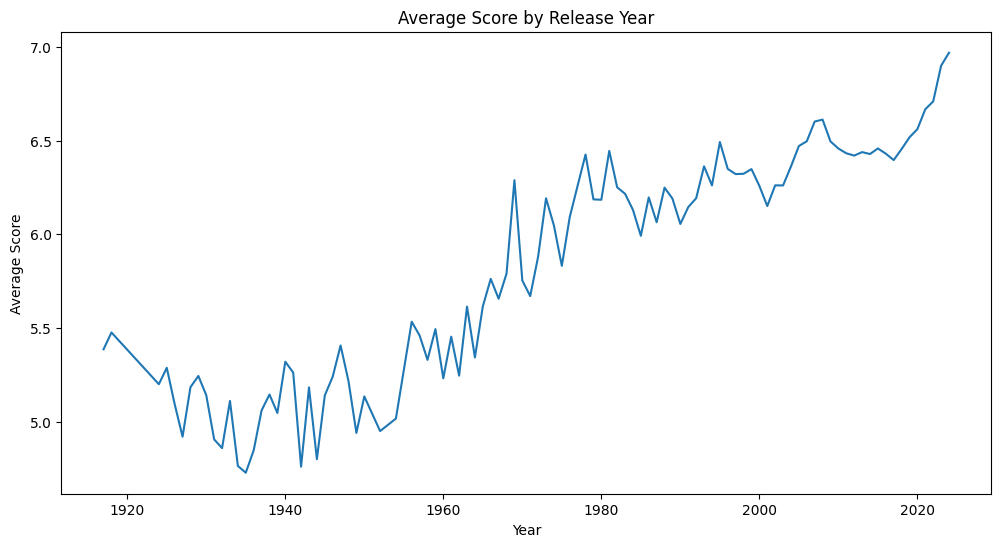

In [71]:
avg_score_by_year = anime.groupby('release_year')['score'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_score_by_year.index, y=avg_score_by_year.values)
plt.title("Average Score by Release Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()

## Studio Avg Score

In [77]:
studio_avg_score = anime.groupby('studios')['score'].mean()
# Count the number of anime for each studio
studio_counts = anime.groupby('studios').size()

# Filter studios with at least 5 anime
valid_studios = studio_counts[studio_counts >= 100].index
filtered_studio_avg_score = studio_avg_score.loc[valid_studios]

# Get the top 20 filtered studios
top_filtered_studios = filtered_studio_avg_score.head(20)

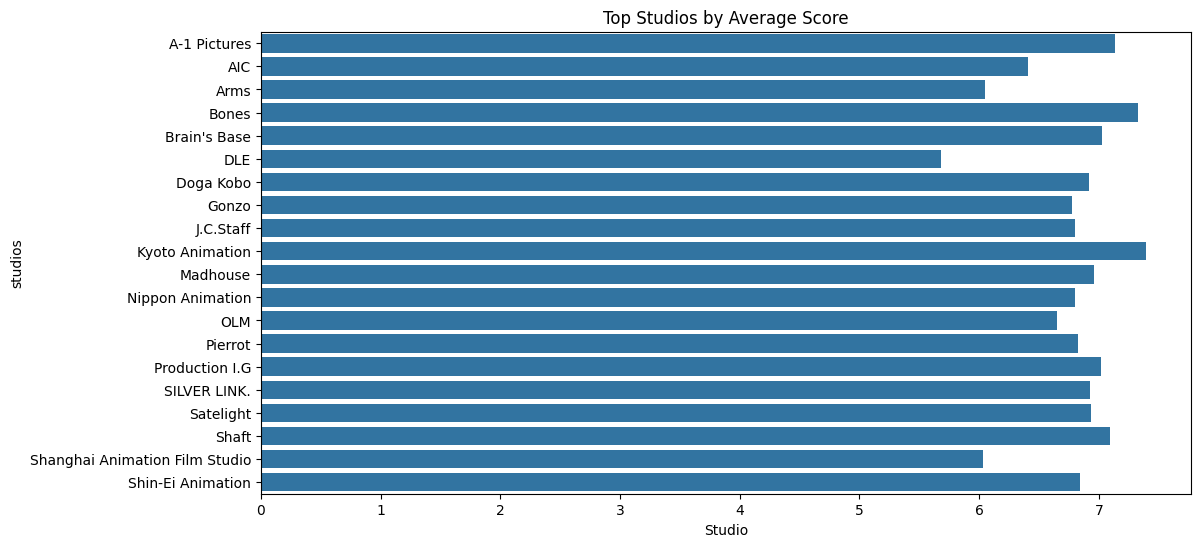

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_filtered_studios.values, y=top_filtered_studios.index)
plt.title("Top Studios by Average Score")
plt.xlabel("Average Score")
plt.xlabel("Studio")
plt.show()

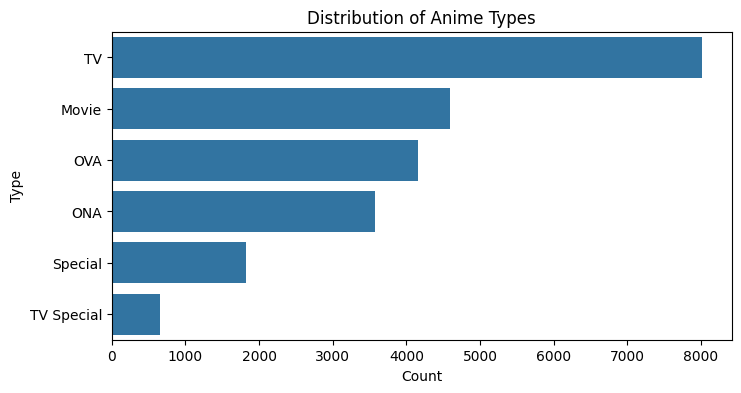

In [79]:
plt.figure(figsize=(8,4))
sns.countplot(y='type_of', data=anime, order=anime['type_of'].value_counts().index)
plt.title("Distribution of Anime Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

### Deep Dive into Demographics
1. Analyzed the distribution of anime across demographics such as Shounen, Seinen, and Josei.
2. Explored the relationship between demographics and average scores.
Key Insight: Certain demographics might consistently score higher due to target audience preferences.


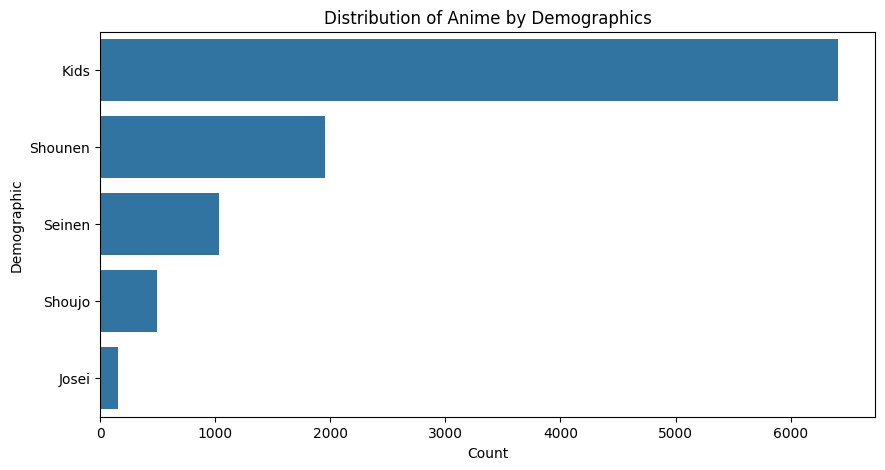

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(y='demographic', data=anime, order=anime['demographic'].value_counts().index)
plt.title("Distribution of Anime by Demographics")
plt.xlabel("Count")
plt.ylabel("Demographic")
plt.show()

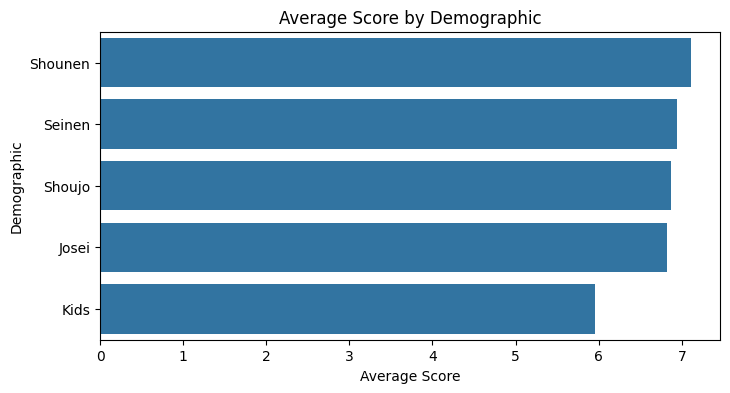

In [81]:
demo_avg_score = anime.groupby('demographic')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=demo_avg_score.values, y=demo_avg_score.index)
plt.title("Average Score by Demographic")
plt.xlabel("Average Score")
plt.ylabel("Demographic")
plt.show()

### Genre Interactions
1. Examined co-occurrence of genres to find popular combinations.
2. Analyzed the impact of multiple genres on anime scores.
Key Insight: Certain genre combinations may drive higher scores or appeal to a broader audience.


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
vectorizer = CountVectorizer(tokenizer=lambda x: x, token_pattern=None, lowercase=False)
genre_matrix = vectorizer.fit_transform(anime['genres'])

In [84]:
co_occurrence = (genre_matrix.T @ genre_matrix).toarray()
genre_names = vectorizer.get_feature_names_out()

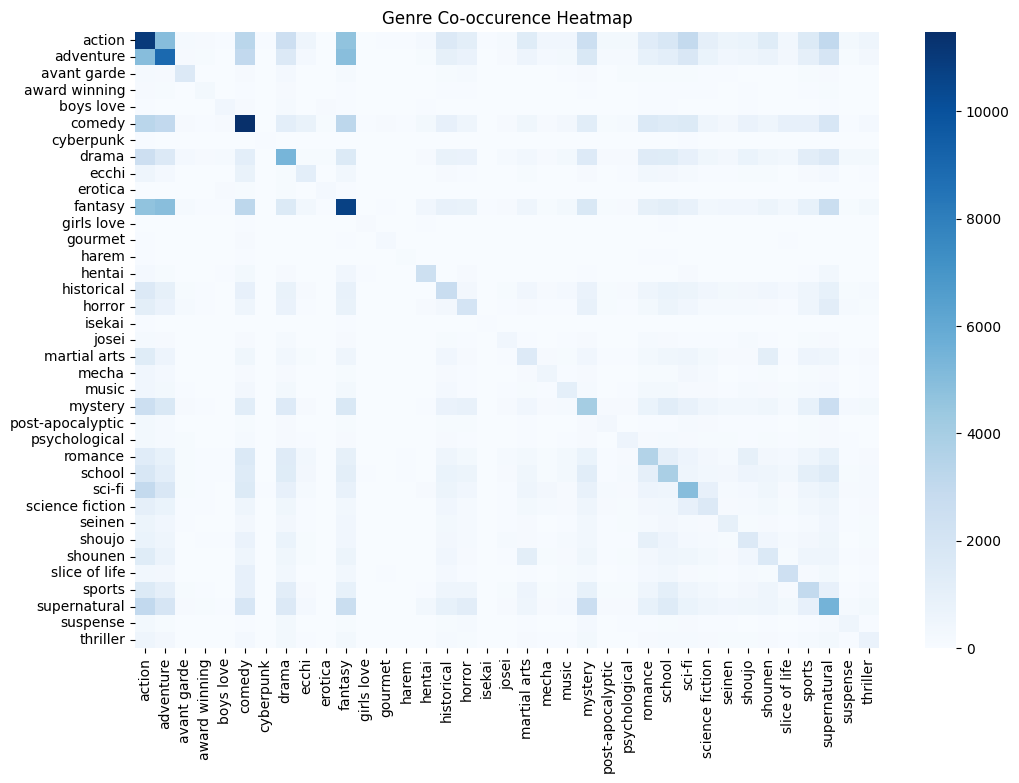

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(co_occurrence, xticklabels=genre_names, yticklabels=genre_names, cmap='Blues', annot=False)
plt.title("Genre Co-occurence Heatmap")
plt.show()

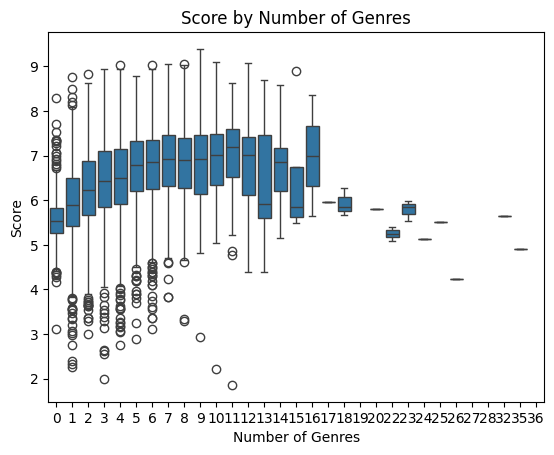

In [86]:
anime['genre_count'] = anime['genres'].apply(len)
sns.boxplot(x='genre_count', y='score', data=anime)
plt.title("Score by Number of Genres")
plt.xlabel("Number of Genres")
plt.ylabel("Score")
plt.show()

### Temporal Patterns
1. Analyzed trends in genre popularity over years.
2. Examined how the average scores of anime have evolved over time.
Key Insight: This reveals shifts in audience preferences or industry focus.

In [89]:
anime['release_year'] = pd.to_datetime(anime['start_date'], errors='coerce').dt.year
# Explode the genres column to have one genre per row
genre_year = anime.explode('genres')

# Group by release year and genre, and count the number of anime
genre_year = genre_year.groupby(['release_year', 'genres']).size().unstack(fill_value=0)

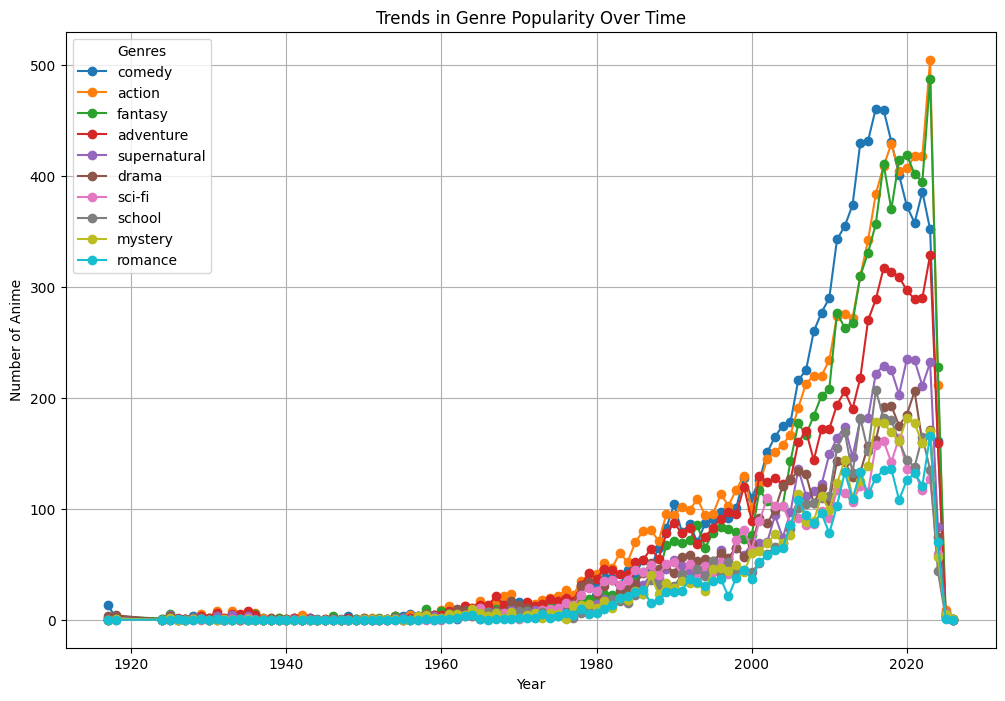

In [91]:
top_genres = genre_year.sum(axis=0).nlargest(10).index

genre_year[top_genres].plot(kind='line', figsize=(12, 8), marker='o')
plt.title("Trends in Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.legend(title="Genres", loc="upper left")
plt.grid(True)
plt.show()

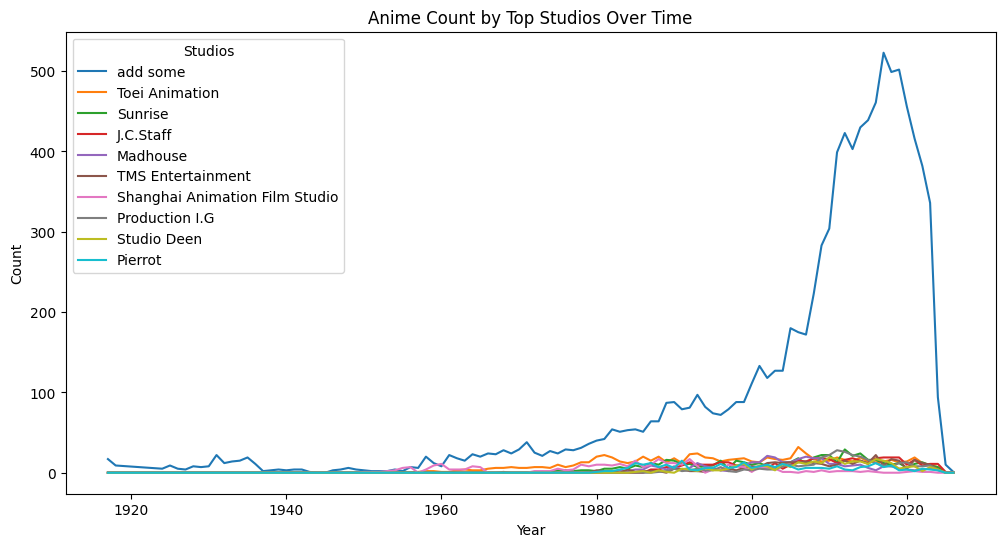

In [95]:
studio_year = anime.groupby(['studios', 'release_year']).size().unstack(fill_value=0)

top_studios = studio_year.sum(axis=1).nlargest(10).index
studio_year.loc[top_studios].T.plot(kind='line', figsize=(12, 6))
plt.title("Anime Count by Top Studios Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Studios")
plt.show()



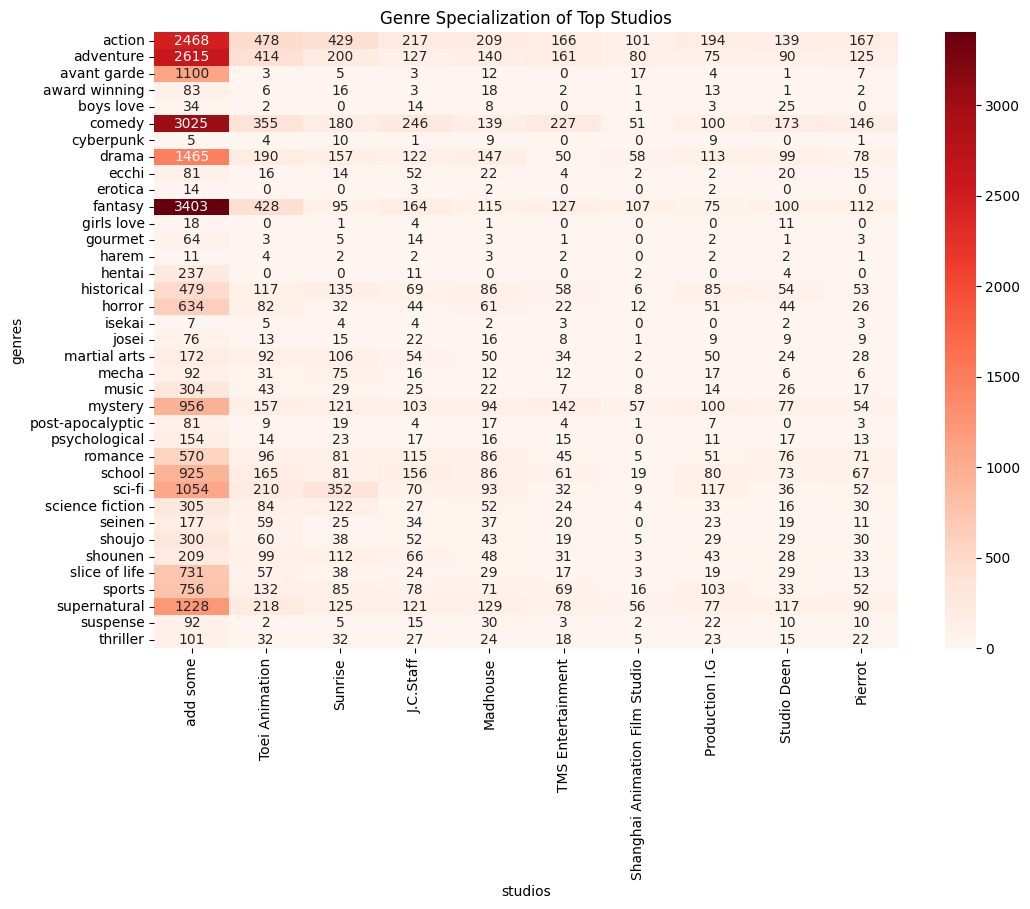

In [97]:
studio_genres = anime.explode('genres').groupby(['studios', 'genres']).size().unstack(fill_value=0)
studio_genres = studio_genres.loc[top_studios].T

plt.figure(figsize=(12, 8))
sns.heatmap(studio_genres, cmap='Reds', annot=True, fmt="d")
plt.title("Genre Specialization of Top Studios")
plt.show()


### Outliers
Outliers are detected in numerical fields like `score`, `ranked`, and `members`. These extreme values might represent anomalies, errors, or genuinely popular anime.

**Plan to Handle Outliers:**
- Leave outliers for `score`, as these likely represent extreme preferences.
- Investigate outliers in `members` and `popularity` for potential data issues.
- For analysis, use trimmed datasets to exclude extreme outliers.



In [103]:
missing_values = anime.isnull().sum().sort_values(ascending=False)
print(missing_values)

premiered          20024
demographic        15905
end_date           15463
scored_by           9329
score               9329
type_of             3117
start_date           837
release_year         837
img_url              202
synonyms               0
synopsis               0
members                0
popularity             0
name                   0
ranked                 0
name_english           0
total_episodes         0
favorites              0
aired                  0
source                 0
watching               0
genres                 0
studios                0
duration_per_ep        0
rating                 0
plan_to_watch          0
dropped                0
on_hold                0
completed              0
total                  0
scored_10_by           0
scored_9_by            0
scored_8_by            0
scored_4_by            0
scored_5_by            0
scored_6_by            0
scored_7_by            0
scored_1_by            0
scored_2_by            0
scored_3_by            0


In [104]:
# Identify missing values
missing_counts = anime.isnull().sum()
missing_percentage = (missing_counts / len(anime)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Percentage': missing_percentage})

# Display missing values
print(missing_df[missing_df['Missing Count'] > 0])

              Missing Count  Percentage
score                  9329   35.951289
type_of                3117   12.012024
premiered             20024   77.166750
demographic           15905   61.293306
scored_by              9329   35.951289
img_url                 202    0.778450
start_date              837    3.225558
end_date              15463   59.589965
release_year            837    3.225558


In [105]:
# Define a function to detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in 'score'
score_outliers = detect_outliers(anime, 'score')
print("Outliers in 'score':\n", score_outliers)


Outliers in 'score':
                                 name_english  \
49             Frieren: Beyond Journey's End   
13469                               C.L.A.Y.   
13470                                 4.Eyes   
13471                      Dead Girl Trailer   
13472                             Dead World   
...                                      ...   
13667                            Wonder Momo   
22375                              I Like It   
22376  3D Onara Gorou ga Dance Dance Dance!!   
25827                           Tsui no Sora   
25828   University Girls: Special Counseling   

                                        name  score  ranked  popularity  \
49                         Sousou no Frieren   9.39       1         304   
13469                               C.L.A.Y.   3.53   13250        9703   
13470                                 4.Eyes   3.53   13249       12630   
13471                      Dead Girl Trailer   3.55   13248       10428   
13472                     

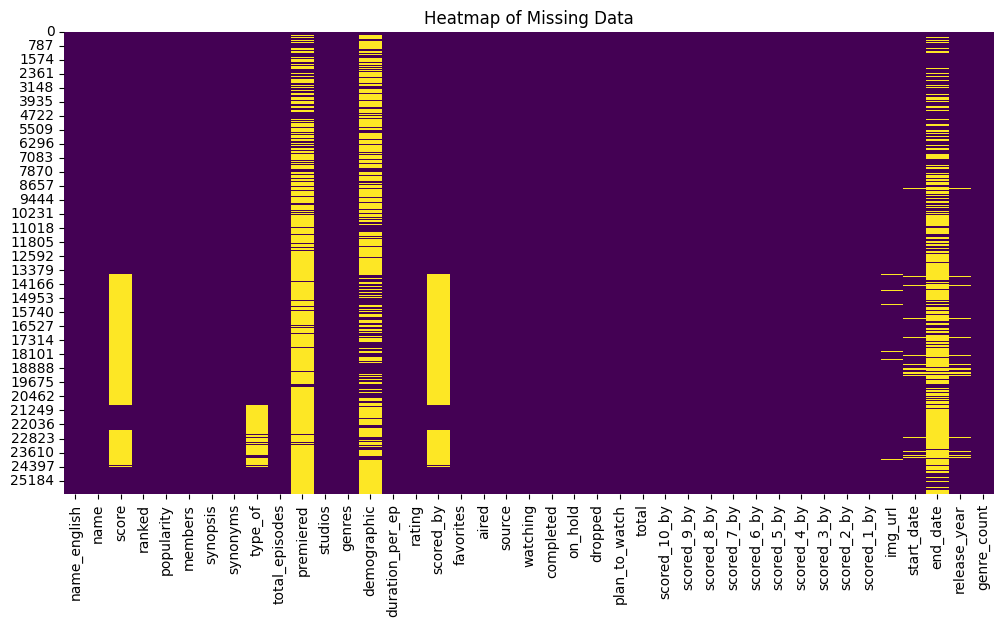

In [106]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(anime.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

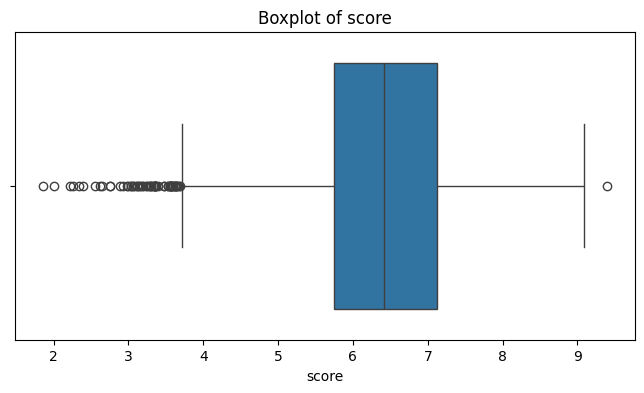

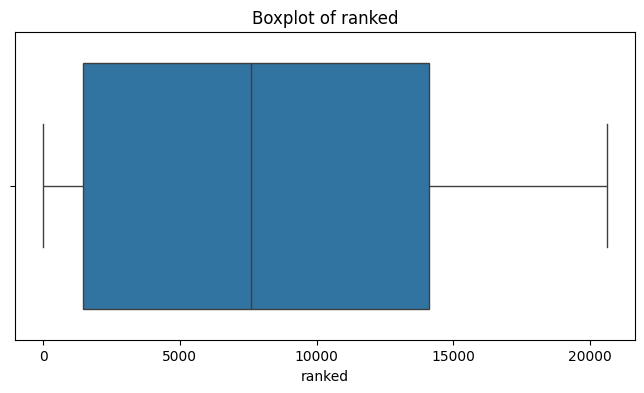

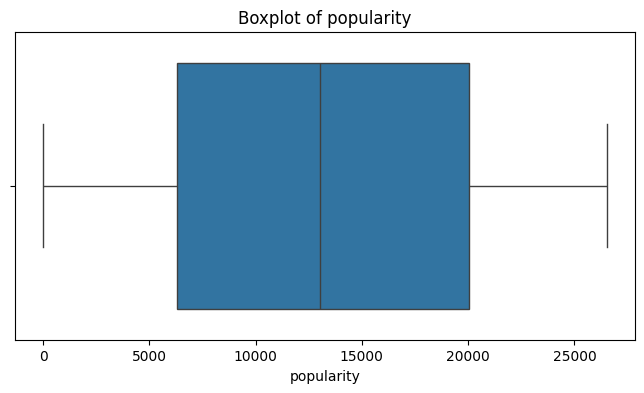

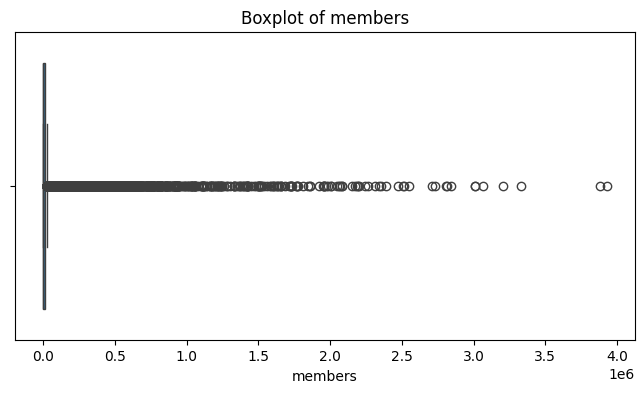

In [107]:
# Plot boxplots for numerical fields
numerical_fields = ['score', 'ranked', 'popularity', 'members']
for field in numerical_fields:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=anime[field])
    plt.title(f"Boxplot of {field}")
    plt.show()
